# DIY Multilayer Perceptron
I've written some (questionable) code in [mlp-regressor.py](mlp-regressor.py) to try to implement a multi-layer perceptron. Let's use it to see if we can predict wine quality.

First, you'll need to `pip install ucimlrepo` to get the data-fetching module. The `requirements.txt` file should now be fixed as well (it had some sneaky windows stuff in there).

In [1]:
# copied from https://archive.ics.uci.edu/dataset/186/wine+quality
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # lazy splitting
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as numpy arrays)
X = wine_quality.data.features.values
y = wine_quality.data.targets.values

# print out the descriptors
wine_quality.data.original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


array([[<Axes: xlabel='fixed_acidity', ylabel='fixed_acidity'>,
        <Axes: xlabel='volatile_acidity', ylabel='fixed_acidity'>,
        <Axes: xlabel='citric_acid', ylabel='fixed_acidity'>,
        <Axes: xlabel='residual_sugar', ylabel='fixed_acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed_acidity'>,
        <Axes: xlabel='free_sulfur_dioxide', ylabel='fixed_acidity'>,
        <Axes: xlabel='total_sulfur_dioxide', ylabel='fixed_acidity'>,
        <Axes: xlabel='density', ylabel='fixed_acidity'>,
        <Axes: xlabel='pH', ylabel='fixed_acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed_acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed_acidity'>,
        <Axes: xlabel='quality', ylabel='fixed_acidity'>],
       [<Axes: xlabel='fixed_acidity', ylabel='volatile_acidity'>,
        <Axes: xlabel='volatile_acidity', ylabel='volatile_acidity'>,
        <Axes: xlabel='citric_acid', ylabel='volatile_acidity'>,
        <Axes: xlabel='residual_sugar', ylabel='vol

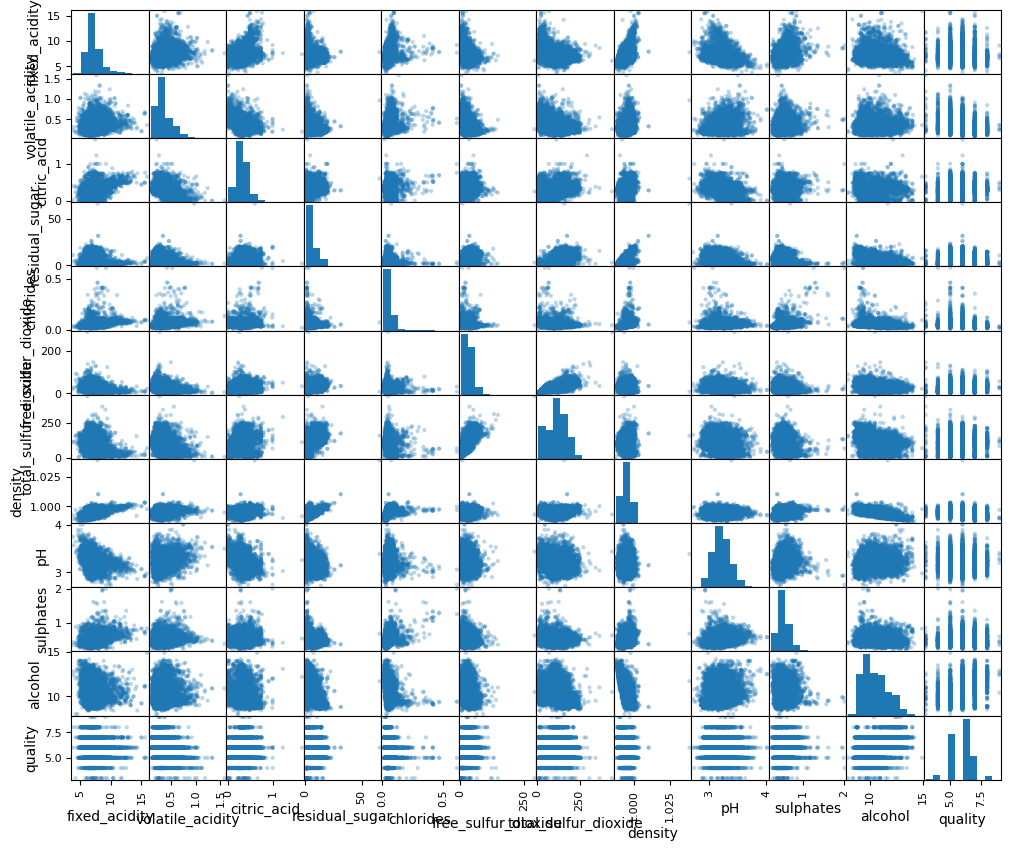

In [2]:
# look at the original data
import pandas as pd
pd.plotting.scatter_matrix(wine_quality.data.original, alpha=0.3, figsize=(12, 10))

In [3]:
# append the colour as binary encoded
X = np.column_stack([X, (wine_quality.data.original.color == "red").astype(int)])

# add some jitter to y
y = y + np.random.normal(0, 0.1, y.shape)

In [4]:
# Split into 80/20/20 Train/test/val
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=219)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2/0.8, random_state=219)

In [5]:
# calculate norm params on test, excluding colour
mu = X_train[:, :-1].mean(axis=0)
std = X_train[:, :-1].std(axis=0)

X_train[:, :-1] = (X_train[:, :-1] - mu) / std
X_val[:, :-1] = (X_val[:, :-1] - mu) / std
X_test[:, :-1] = (X_test[:, :-1] - mu) / std

## Build and train an MLP
Up to now it's been pretty standard data exploration, preprocessing and splitting. You're welcome to tweak those things, of course.

I've written a class `MLPRegressor` that should be able to train a multi-layer perceptron. It's not very good, but it's a start. You can use it like this:

```python
from mlp_regressor import MLPRegressor
mlp = MLPRegressor(X_train.shape[1])
mlp.add_layer(<number of neurons>, "activation function")
... repeat
print(mlp) # to see a summary of layers

loss = mlp.train(X_train, y_train, step_size, epochs)
plt.plot(loss)
```

It's very inefficient, so don't go too crazy with number of neurons.

In [6]:
# build a basic MLP
import importlib
import mlp_regressor
# importlib reloads the module from scratch every time you run this cell
# useful if you make any changes to MLPRegressor
importlib.reload(mlp_regressor)
from mlp_regressor import MLPRegressor

mlp = MLPRegressor(X_train.shape[1])
mlp.add_layer(5, "tanh")
mlp.add_layer(5, "tanh")

print(mlp)

MLPRegressor
  Layer 1: 12 inputs -> 5 neurons, activation=tanh
  Layer 2: 5 inputs -> 5 neurons, activation=tanh
Total trainable parameters: 95


In [ ]:
# Try a scatter plot to check performance


## Part 2: Modify the MLP
Right now, the MLP only does whole-batch gradient descent. Modify it to allow training in batches. Does this help the performance?

Try to read through the forward and backward passes to understand how it works. It's entirely possible I've made a mistake somewhere, so don't hesitate to ask if something doesn't make sense.